## In this project I will use a Decision Trees algorithm from scikit-learn and random forests to predict whether a patient had a successful corrective spine surgery. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


This data represents patients who had a spinal condition called Kyphosis and a corrective spinal operation. Column kyphosis states whether the condition was absent after the operation. Age is the patients age in months; this data represents children. Number is the number of vertabrae involved in the operation. Start is the top most vertabrae that was operated on. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


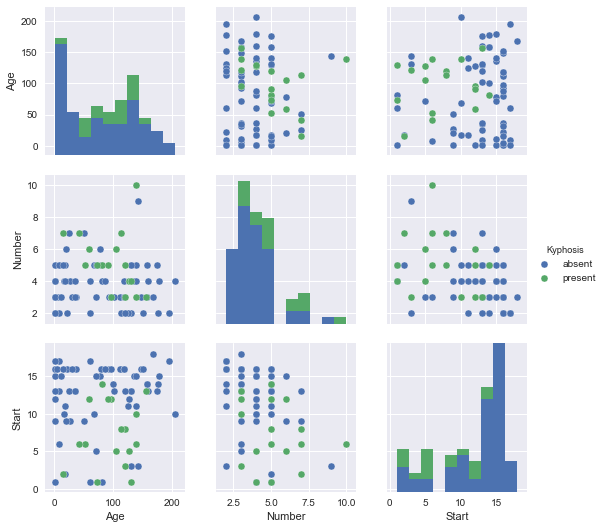

In [6]:
sns.pairplot(df, hue='Kyphosis')

In [ ]:
# I will build a single decision tree and a random forest 

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)

In [9]:
y = df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[19  1]
 [ 4  1]]


             precision    recall  f1-score   support

     absent       0.83      0.95      0.88        20
    present       0.50      0.20      0.29         5

avg / total       0.76      0.80      0.76        25



# From random forest model 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  0]
 [ 5  0]]


             precision    recall  f1-score   support

     absent       0.80      1.00      0.89        20
    present       0.00      0.00      0.00         5

avg / total       0.64      0.80      0.71        25



/Users/fabian/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
